In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Load the dataset
df = pd.read_csv("D:\\Python\\Sources\\realtor-data.csv")

# Display the first 5 rows of the dataset to verify the import
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [2]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [3]:
df.shape

(206000, 10)

In [4]:
df.isnull().sum()

status                 0
bed                31751
bath               30864
acre_lot           52431
city                  52
state                  0
zip_code             195
house_size         30277
prev_sold_date    129581
price                  0
dtype: int64

In [5]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,174249.000000,175136.000000,153569.000000,205805.000000,1.757230e+05,2.060000e+05
mean,3.531383,2.622431,8.618086,2165.771808,2.233759e+03,8.729601e+05
std,2.688206,2.929336,629.443554,1731.612917,4.198274e+03,1.448204e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.130000,1235.000000,1.152000e+03,2.499000e+05
50%,3.000000,2.000000,0.340000,2038.000000,1.728000e+03,5.249000e+05
75%,4.000000,3.000000,1.140000,2191.000000,2.634000e+03,8.900000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


In [6]:
# Creating a copy of the dataset
df1 = df.copy()

# Remove rows with null values in 'acre_lot' and 'house_size' columns
df1.dropna(subset=['acre_lot', 'house_size'], inplace=True)

In [7]:
# Converting 'prev_sold_date' column to datetime
df1['prev_sold_date'] = pd.to_datetime(df1['prev_sold_date'])

In [8]:
# Creating new column Price per Square Foot
df1['price_per_sqft'] = df1['price'] / df1['house_size']

# Creating new column Ratio of Bedrooms to Bathrooms
df1['bed_bath_ratio'] = df1['bed'] / df1['bath']

# Creating new column Property Size Category (based on acre_lot)
df1['size_category_acre'] = pd.cut(df1['acre_lot'], bins=[0, 1, 5, 10, np.inf], labels=['Small', 'Medium', 'Large', 'Extra Large'])

# Creating new column Property Size Category (based on house_size)
df1['size_category_house'] = pd.cut(df1['house_size'], bins=[0, 1000, 2000, 3000, np.inf], labels=['Small', 'Medium', 'Large', 'Extra Large'])

# Price Analysis

In [9]:
# Calculate average price by city
avg_price_by_city = df.groupby('city')['price'].mean()

# Calculate average price by state
avg_price_by_state = df.groupby('state')['price'].mean()

# Sort by average price in descending order
avg_price_by_city = avg_price_by_city.sort_values(ascending=False)
avg_price_by_state = avg_price_by_state.sort_values(ascending=False)

# Display the results
print("Average Price of Houses by City:\n")
print(avg_price_by_city)
print("\nAverage Price of Houses by State:\n")
print(avg_price_by_state)

Average Price of Houses by City:

city
Waterfront        1.200000e+07
Woods Hole        8.011154e+06
Chilmark          6.789286e+06
Siasconset        6.495000e+06
Tisbury           6.016333e+06
                      ...     
Petersham         5.500000e+04
Epping            5.000000e+04
Jefferson City    3.490000e+04
Rowe              2.800000e+04
McCormick         1.895000e+04
Name: price, Length: 719, dtype: float64

Average Price of Houses by State:

state
Massachusetts     1.013823e+06
Virgin Islands    7.951458e+05
New York          6.033344e+05
New Hampshire     5.539129e+05
Puerto Rico       4.371370e+05
Rhode Island      4.206369e+05
Connecticut       4.066700e+05
New Jersey        3.334900e+05
Vermont           3.244557e+05
Virginia          7.500000e+04
Tennessee         3.490000e+04
South Carolina    1.895000e+04
Name: price, dtype: float64


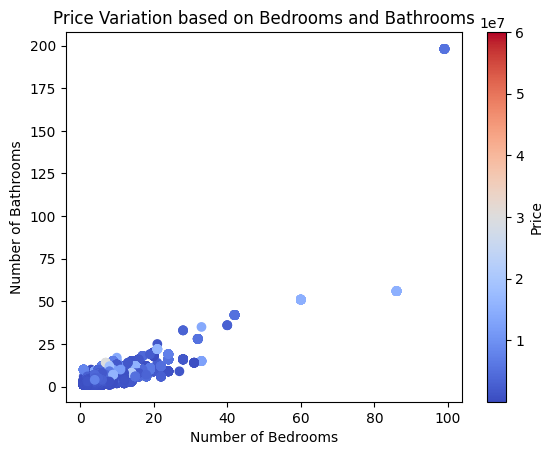

In [10]:
#Price Variation based on Bedrooms and Bathrooms

plt.scatter(df['bed'], df['bath'], c=df['price'], cmap='coolwarm')
plt.colorbar(label='Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.title('Price Variation based on Bedrooms and Bathrooms')
plt.show()

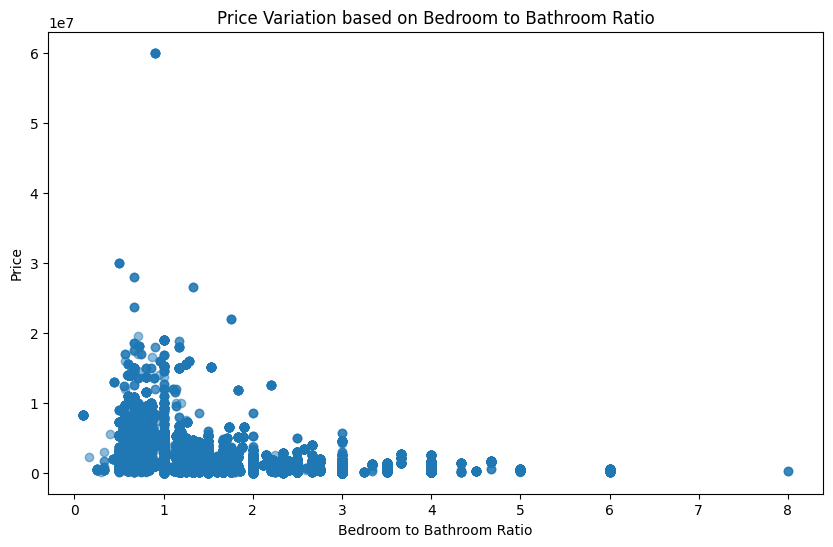

In [11]:
# Calculate the ratio of bedrooms to bathrooms
df1['bedroom_bathroom_ratio'] = df1['bed'] / df1['bath']

# Price Variation based on Bedroom to Bathroom Ratio
plt.figure(figsize=(10, 6))
plt.scatter(df1['bedroom_bathroom_ratio'], df1['price'], alpha=0.5)
plt.xlabel('Bedroom to Bathroom Ratio')
plt.ylabel('Price')
plt.title('Price Variation based on Bedroom to Bathroom Ratio')
plt.show()

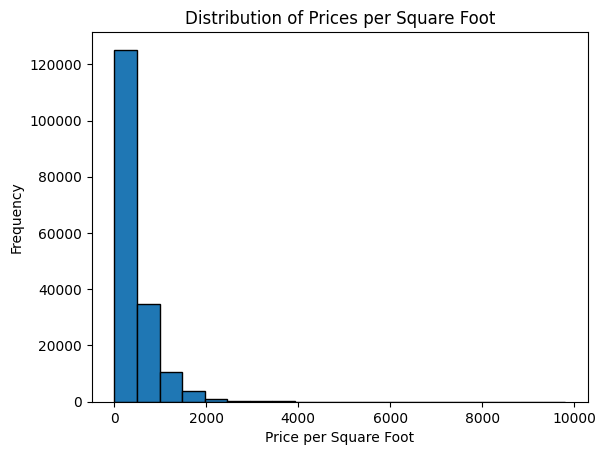

In [12]:
# Calculate prices per square foot
price_per_sqft = df['price'] / df['house_size']

# Distribution of Prices per Square Foot
plt.hist(price_per_sqft, bins=20, edgecolor='black')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.title('Distribution of Prices per Square Foot')
plt.show()

# Property Size Analysis

In [13]:
# Calculate frequency of property size categories based on acre_lot
acre_lot_freq = df1['size_category_acre'].value_counts()

# Calculate frequency of property size categories based on house_size
house_size_freq = df1['size_category_house'].value_counts()

# Display the most common property size categories based on acre_lot
print("Most common property size categories based on acre_lot:")
print(acre_lot_freq)

# Display the most common property size categories based on house_size
print("\nMost common property size categories based on house_size:")
print(house_size_freq)

Most common property size categories based on acre_lot:
Small          102101
Medium          16377
Extra Large      2800
Large            2255
Name: size_category_acre, dtype: int64

Most common property size categories based on house_size:
Medium         48815
Extra Large    30964
Large          30210
Small          13733
Name: size_category_house, dtype: int64


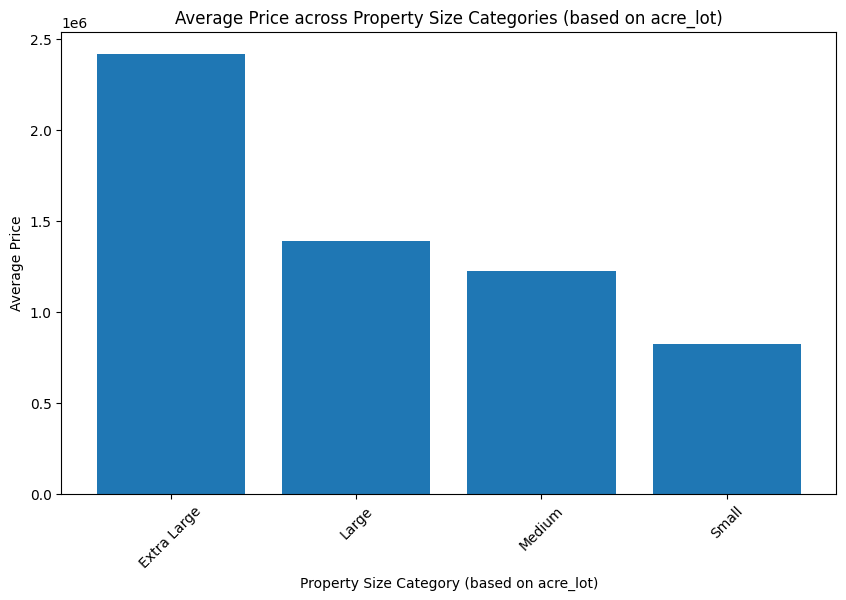

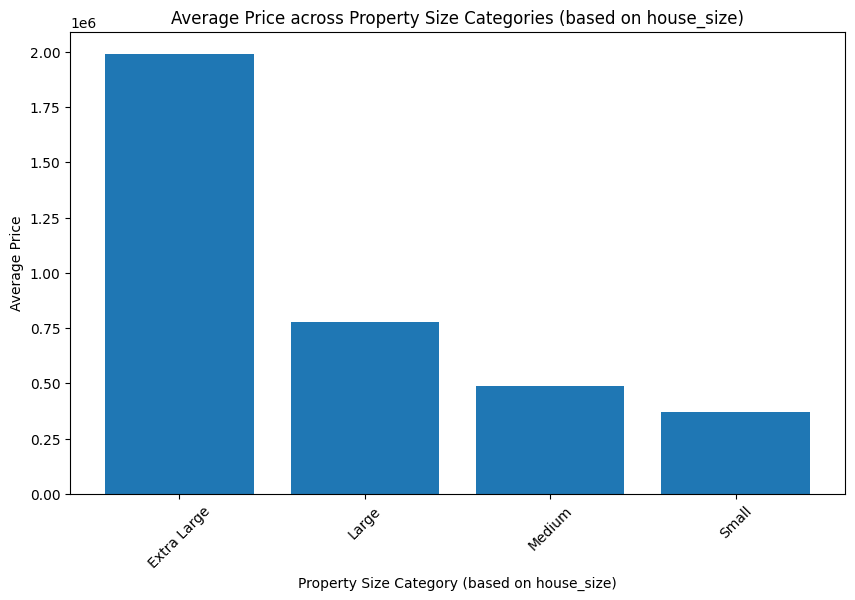

In [14]:
# Calculate the average price for each property size category based on acre_lot
avg_price_acre = df1.groupby('size_category_acre')['price'].mean().sort_values(ascending=False)

# Average Price across Property Size Categories (based on acre_lot)
plt.figure(figsize=(10, 6))
plt.bar(avg_price_acre.index, avg_price_acre)
plt.title("Average Price across Property Size Categories (based on acre_lot)")
plt.xlabel("Property Size Category (based on acre_lot)")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

# Average Price across Property Size Categories (based on house_size)
avg_price_house = df1.groupby('size_category_house')['price'].mean().sort_values(ascending=False)

# Create a bar plot for average price based on house_size
plt.figure(figsize=(10, 6))
plt.bar(avg_price_house.index, avg_price_house)
plt.title("Average Price across Property Size Categories (based on house_size)")
plt.xlabel("Property Size Category (based on house_size)")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

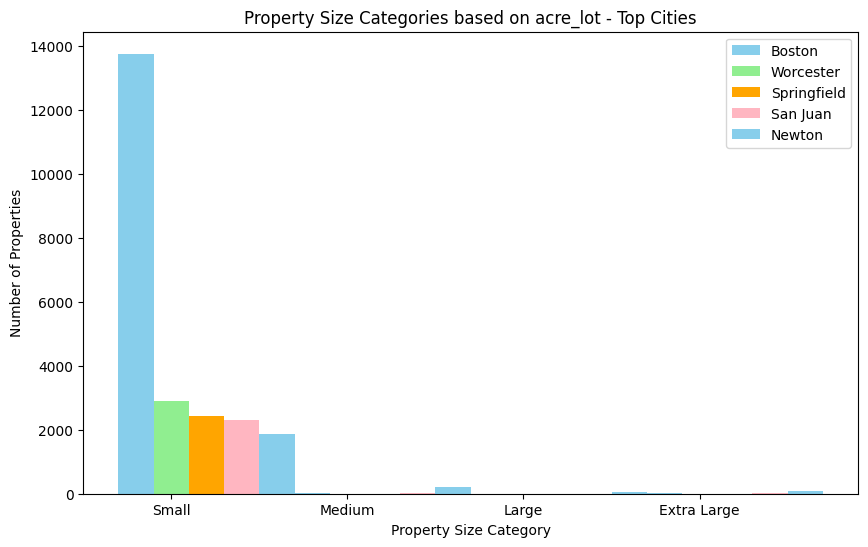

In [15]:
# Group the data by city and property size category based on acre_lot
city_size_category_acre = df1.groupby(['city', 'size_category_acre']).size().unstack().fillna(0)

# Get the list of property size categories
size_categories = city_size_category_acre.columns.tolist()

# Set the number of cities to display on the plot
num_cities = 5

# Select the top N cities based on the number of properties
top_cities = city_size_category_acre.sum(axis=1).nlargest(num_cities).index

# Subset the data for the top cities
top_cities_data = city_size_category_acre.loc[top_cities]

# Property Size Categories based on acre_lot - Top Cities
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(size_categories))
colors = ['skyblue', 'lightgreen', 'orange', 'lightpink']

for i, city in enumerate(top_cities_data.index):
    plt.bar(index + (bar_width * i), top_cities_data.loc[city], bar_width, label=city, color=colors[i % len(colors)])

plt.title("Property Size Categories based on acre_lot - Top Cities")
plt.xlabel("Property Size Category")
plt.ylabel("Number of Properties")
plt.xticks(index + bar_width, size_categories)
plt.legend()
plt.show()

# Location Analysis

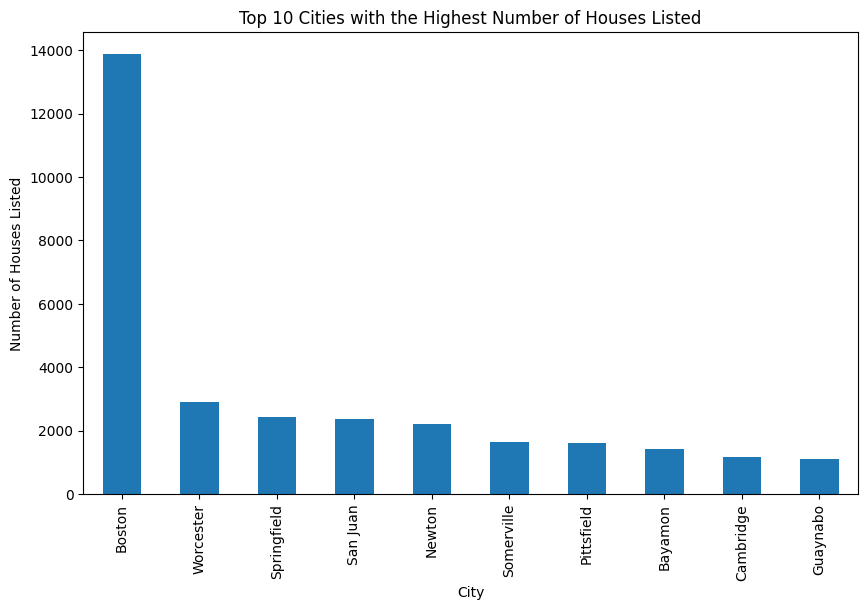

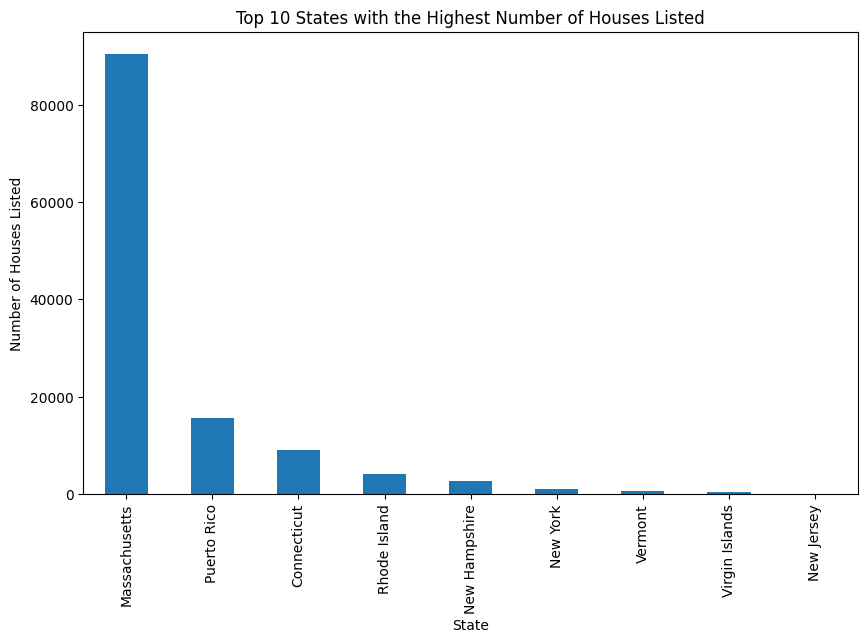

In [16]:
# Count the number of houses listed for each city
city_counts = df1['city'].value_counts()

# Select the top 10 cities with the highest number of houses listed
top_cities = city_counts.head(10)

# Top 10 Cities with the Highest Number of Houses Listed
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities with the Highest Number of Houses Listed')
plt.xlabel('City')
plt.ylabel('Number of Houses Listed')
plt.show()



# Count the number of houses listed for each state
state_counts = df1['state'].value_counts()

# Select the top 10 states with the highest number of houses listed
top_states = state_counts.head(10)

# Top 10 States with the Highest Number of Houses Listed
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.title('Top 10 States with the Highest Number of Houses Listed')
plt.xlabel('State')
plt.ylabel('Number of Houses Listed')
plt.show()

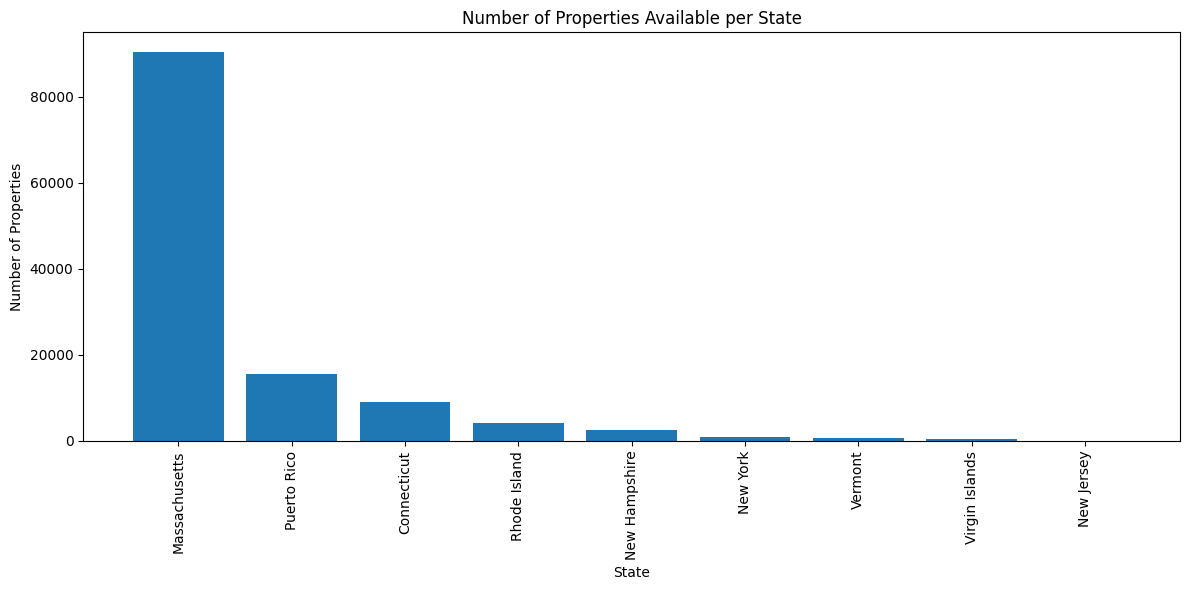

In [17]:
# Count the number of properties for each city and state
city_counts = df1['city'].value_counts()
state_counts = df1['state'].value_counts()

# Determine the number of unique cities and states
num_cities = len(city_counts)
num_states = len(state_counts)

# Number of Properties Available per State
plt.figure(figsize=(12, 6))
plt.bar(range(num_states), state_counts.values, tick_label=state_counts.index)
plt.xlabel('State')
plt.ylabel('Number of Properties')
plt.title('Number of Properties Available per State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()